# EDA & Pre-Processing on gplay Dataset :

Importing required Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Code for getting CSV file :

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gplay.csv to gplay.csv


In [3]:
df = pd.read_csv("gplay.csv")

In [4]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [5]:
df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+
10840,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone


Dropping the Unnammed Column :

In [7]:
df.drop(["Unnamed: 0"], axis=1,inplace = True)

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


Handling Missing Values :

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

Replacing null values with mean value of rating

In [11]:
df["Rating"].fillna(df["Rating"].mean(),inplace = True)

In [13]:
df["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [18]:
df["Type"].fillna("Free",inplace = True)

In [19]:
df["Content Rating"].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [20]:
df["Content Rating"].fillna("Everyone",inplace = True)

In [21]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

Identifying Data Types and conversion as per requirement

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


Review Column

In [24]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [23]:
for data in df["Reviews"]:
    if not(str(data).isnumeric()):
        print(data)

3.0M


In [25]:
df[df["Reviews"] == "3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone


In [26]:
df.drop(10472,inplace=True)

In [27]:
df["Reviews"] = df["Reviews"].astype(int)

 Install column

In [29]:

def clean_installs(x):
    x = str(x)
    x = x.replace(",","")
    x = x.replace("+","")
    return int(x)

In [31]:
df["Installs"] = df["Installs"].map(clean_installs)

In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone


Price Column

In [33]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
def clean_price(x):
    x = str(x)
    x = x.replace("$","")
    return float(x)

In [35]:
df["Price"] = df["Price"].map(clean_price)

In [36]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

Size Column

In [37]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [38]:
def clean_size(x):
    x = str(x)
    
    if x == "Varies with device":
        return np.nan
    elif x[-1] == "M":
        return float(x[:-1])
    else:
        x = float(x[:-1])
        return x/1000

In [39]:
df["Size"] = df["Size"].map(clean_size)

In [40]:
df["Size"].fillna(df["Size"].mean(), inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 846.9+ KB


**Visualization**

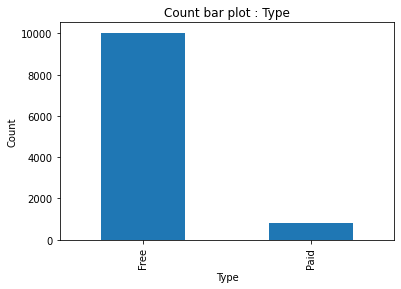

In [45]:
plt.figure()
df["Type"].value_counts().plot(kind="bar")
plt.title("Count bar plot : Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

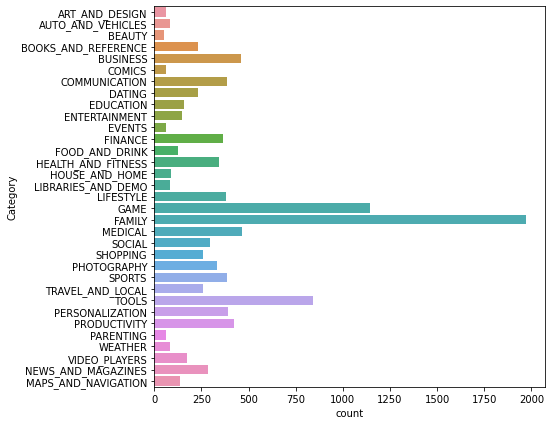

In [54]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, y="Category")
plt.show()

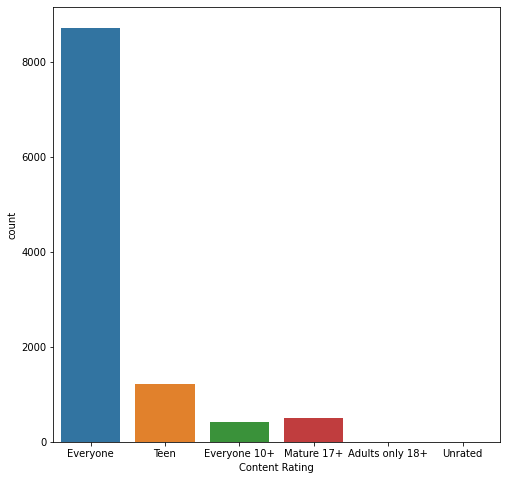

In [57]:
plt.figure(figsize = (8,8))
sns.countplot(df['Content Rating'])
plt.show()

Outliars 

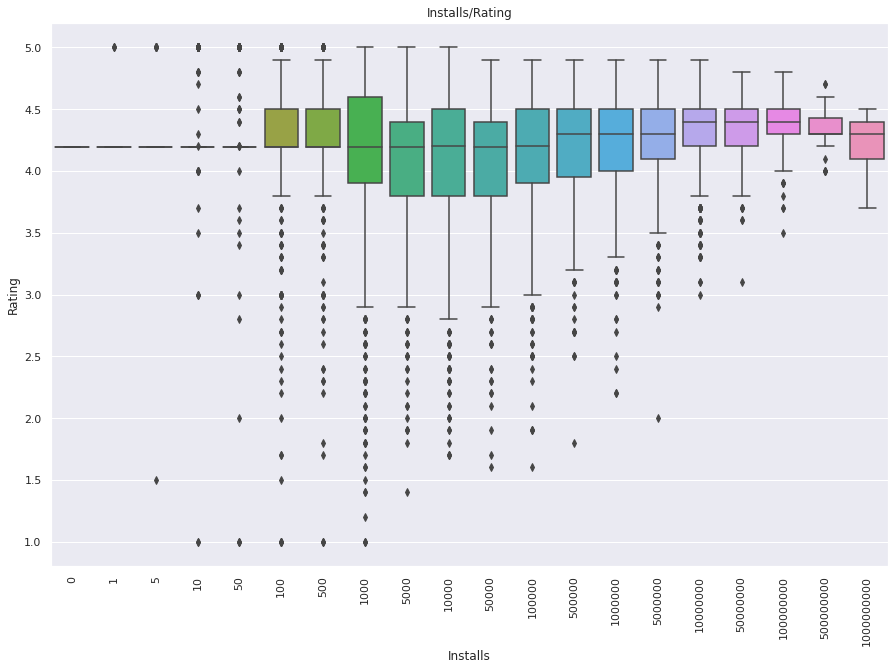

In [63]:
plt.figure(figsize=(15,10))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=df)
plt.title("Installs/Rating")
plt.xticks(rotation=90)
plt.show()

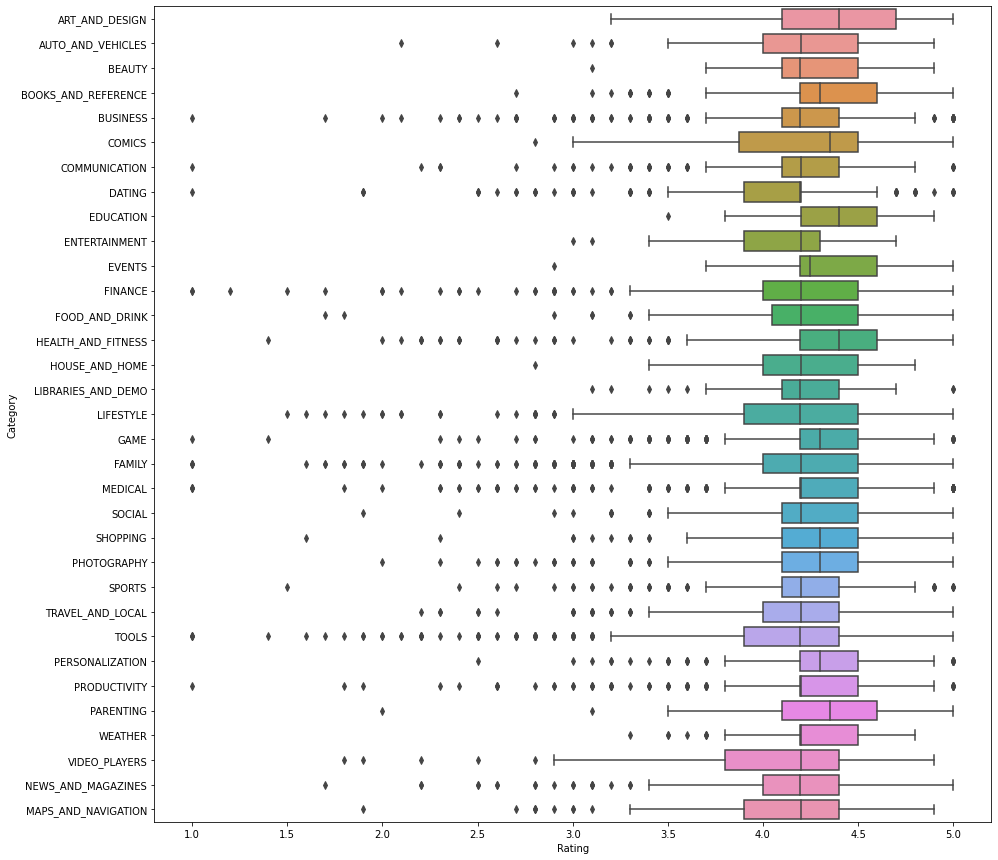

In [58]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x="Rating",y="Category")
plt.show()

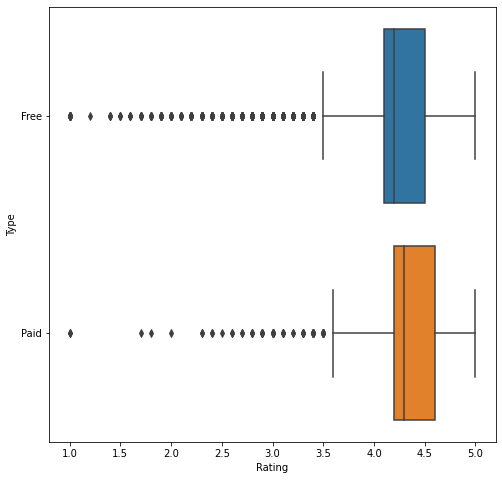

In [61]:
plt.figure(figsize = (8,8))
sns.boxplot(y='Type', x='Rating', data=df)
plt.show()

In [64]:
df[(df["Category"] == "EDUCATION") & (df["Rating"] < 3.8)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
841,EasyBib: Citation Generator,EDUCATION,3.5,1405,7.3,100000,Free,0.0,Everyone


In [65]:
df.drop(841,inplace=True)

In [66]:
df[(df["Category"] == "EVENTS") & (df["Rating"] < 3.5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
5987,Outdoor Movies BC,EVENTS,2.9,7,21.51653,500,Free,0.0,Everyone


In [67]:
df.drop(5987,inplace=True)

In [68]:
df[(df["Category"] == "ENTERTAINMENT") & (df["Rating"] < 3.4)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
862,Digital TV,ENTERTAINMENT,3.1,5241,21.51653,5000000,Free,0.0,Everyone
915,Acorn TV: World-class TV from Britain and Beyond,ENTERTAINMENT,3.0,493,23.00000,50000,Free,0.0,Everyone


In [70]:
df.drop([862,915],inplace=True)

Correlation

In [72]:
cor = df.corr()

In [73]:
cor

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067891,0.074697,0.051051,-0.020250
Reviews,0.067891,1.000000,0.128251,0.643119,-0.009671
Size,0.074697,0.128251,1.000000,0.082218,-0.022997
Installs,0.051051,0.643119,0.082218,1.000000,-0.011694
Price,-0.020250,-0.009671,-0.022997,-0.011694,1.000000


Correlation Using Heatmap

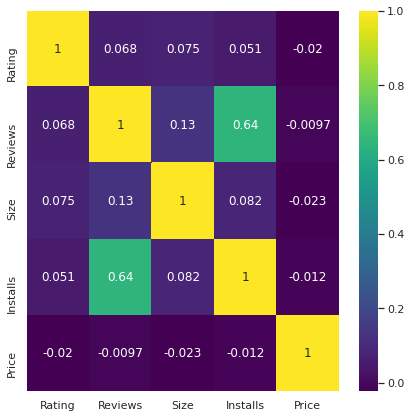

In [76]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

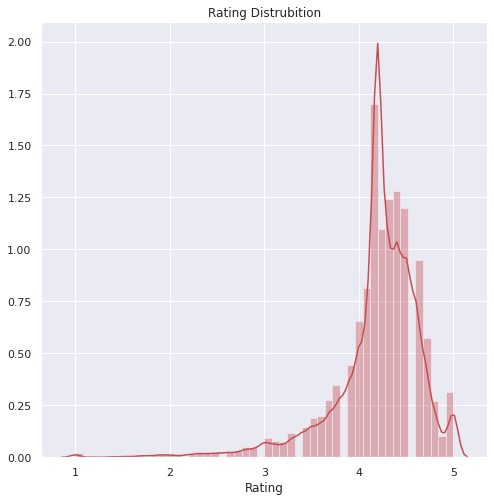

In [78]:
plt.figure(figsize=(8,8))
sns.distplot(df['Rating'],color='r');
plt.title("Rating Distrubition")
plt.show()

Skewness

In [79]:
skew(df["Rating"])

-1.9941716003955778

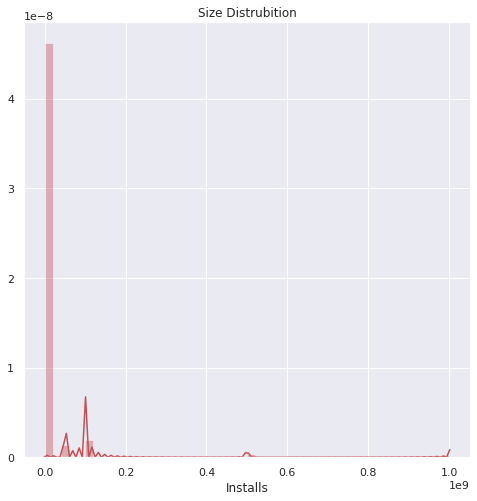

In [80]:
plt.figure(figsize=(8,8))
sns.distplot(df['Installs'],color='r');
plt.title("Size Distrubition")
plt.show()

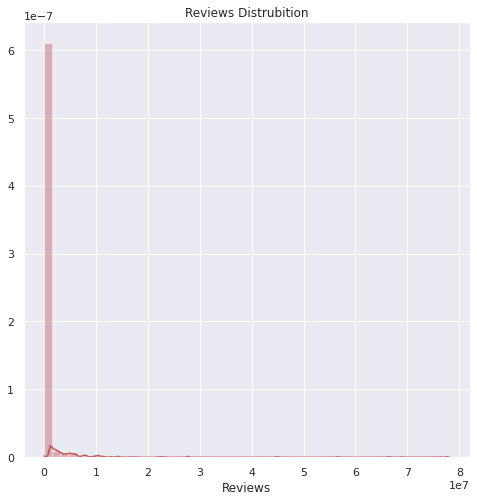

In [81]:
plt.figure(figsize=(8,8))
sns.distplot(df['Reviews'],color='r');
plt.title("Reviews Distrubition")
plt.show()

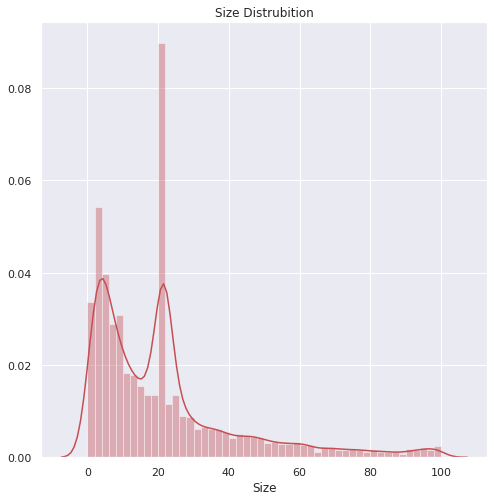

In [84]:
plt.figure(figsize=(8,8))
sns.distplot(df['Size'],color='r');
plt.title("Size Distrubition")
plt.show()

Reducing Skewness by SQRT / LOG

In [85]:
skew(df["Size"])

1.694954401251213

In [86]:
df["Size"] = np.sqrt(df["Size"])

In [87]:
skew(df["Size"])

0.606580926422754

Handling Catagorical & Numeric Data

In [88]:
le = LabelEncoder()

In [89]:
df["Type"] = df["Type"].map({'Free':0,"Paid":1})

In [90]:
df["Type"].unique()

array([0, 1])

In [91]:
df["Type"] = le.fit_transform(df["Type"])

In [92]:
df["Content Rating"] = le.fit_transform(df["Content Rating"])

In [93]:
df["Content Rating"] = df["Content Rating"].astype("int64")

In [94]:
df["Category"] = le.fit_transform(df["Category"])

In [95]:
df["Category"] = df["Category"].astype("int64")

In [96]:
df_cat = df.select_dtypes(object)

In [97]:
df_cat

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
10836,Sya9a Maroc - FR
10837,Fr. Mike Schmitz Audio Teachings
10838,Parkinson Exercices FR
10839,The SCP Foundation DB fr nn5n


In [98]:
df_num = df.select_dtypes(["float64","int64"])

In [99]:
df_num

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,4.100000,159,4.358899,10000,0,0.0,1
1,0,3.900000,967,3.741657,500000,0,0.0,1
2,0,4.700000,87510,2.949576,5000000,0,0.0,1
3,0,4.500000,215644,5.000000,50000000,0,0.0,4
4,0,4.300000,967,1.673320,100000,0,0.0,1
...,...,...,...,...,...,...,...,...
10836,11,4.500000,38,7.280110,5000,0,0.0,1
10837,11,5.000000,4,1.897367,100,0,0.0,1
10838,20,4.193338,3,3.082207,1000,0,0.0,1
10839,3,4.500000,114,4.638591,1000,0,0.0,3


In [100]:
df_new = pd.concat([df_cat,df_num],axis=1)

In [102]:
df_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,4.358899,10000,0,0.0,1
1,Coloring book moana,0,3.9,967,3.741657,500000,0,0.0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,2.949576,5000000,0,0.0,1
3,Sketch - Draw & Paint,0,4.5,215644,5.000000,50000000,0,0.0,4
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,1.673320,100000,0,0.0,1
